In [63]:
from Preprocessor_caller import caller
from model_creator_exe import Model_Executer
from final_data_generator import Synthetic_Data
import datasets
import pandas as pd
from sdv.evaluation.single_table import get_column_plot  
import plotly.io as pio 
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset
import joblib
from sklearn.metrics import classification_report
from xai_exe import Explainers

<h1> Preprocesamiento de Datos </h1>

In [12]:
# Cargar el archivo CSV en un DataFrame
df = datasets.gdd.load_data()

# Especificar la columna objetivo
label_column = "Label"  

# Instancia de la clase caller y preprocesamiento de los datos
preprocessor = caller(df, label_column)
dataframe_imputado = preprocessor.df  

# Mostrar las primeras filas del dataframe preprocesado
dataframe_imputado.head()

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 187: early stopping
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,MotorData.ActCurrent,MotorData.ActPosition,MotorData.ActSpeed,MotorData.IsAcceleration,MotorData.IsForce,MotorData.Motor_Pos1reached,MotorData.Motor_Pos2reached,MotorData.Motor_Pos3reached,MotorData.Motor_Pos4reached,NVL_Recv_Ind.GL_Metall,NVL_Recv_Ind.GL_NonMetall,NVL_Recv_Storage.GL_I_ProcessStarted,NVL_Recv_Storage.GL_I_Slider_IN,NVL_Recv_Storage.GL_I_Slider_OUT,NVL_Recv_Storage.GL_LightBarrier,NVL_Send_Storage.ActivateStorage,PLC_PRG.Gripper,PLC_PRG.MaterialIsMetal,Label
0,0.008805,0.578265,-0.260695,-6.786460,0.009183,0,0,0,0,0,1,0,1,0,1,0,0,0,0
1,0.018945,0.578174,-0.264888,-6.805781,0.009052,0,0,0,0,0,1,0,1,0,1,0,0,0,0
2,0.006999,0.580150,-0.260968,-6.778614,-0.008784,0,0,0,0,0,1,0,1,0,1,0,0,0,0
3,0.023527,0.573689,-0.264173,-6.838124,0.057766,0,0,0,0,0,1,0,1,0,1,0,0,0,0
4,0.023527,0.573689,-0.264173,-6.838124,0.057766,0,0,0,0,0,1,0,1,0,1,0,0,0,0


<h1> Entrenamiento de los Modelos </h1>

In [18]:
# Instanciar la clase Model_Executer con el dataframe preprocesado y la columna objetivo
model_executer = Model_Executer(dataframe_imputado, label_column)

# Obtener y mostrar las métricas de los modelos
metrics_dict = model_executer.metrics_dict
print("Métricas del modelo XGBoost:", metrics_dict["XGB"])
print("Métricas del modelo SVC:", metrics_dict["SVC"])
print("Métricas del modelo Naive Bayes:", metrics_dict["NB"])

# Guardar los modelos entrenados (opcional)
model_executer.saver(model_executer.booster, "modelos_guardados", "xgboost_model")
model_executer.saver(model_executer.svc, "modelos_guardados", "svc_model")
model_executer.saver(model_executer.nb, "modelos_guardados", "naive_bayes_model")

Epoch 289: early stopping
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-10-17 15:16:27,360] A new study created in memory with name: no-name-ba97ecee-59bf-45cb-a63e-4177b50f0824


Entering optimization 1


[I 2024-10-17 15:16:28,643] Trial 0 finished with value: 0.8831 and parameters: {'obj': 'reg:squarederror', 'booster': 'gbtree', 'colsample_bynode': 0.6847274917846993, 'colsample_bytree': 0.5755258474512747, 'alpha': 1.5488787172201913e-07, 'lambda': 1.1488886021591725e-07, 'subsample': 0.7239341539232644, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.13259080792215297, 'gamma': 2.54526641671475e-05, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.8831.
[I 2024-10-17 15:18:08,689] Trial 1 finished with value: 0.8723 and parameters: {'obj': 'reg:logistic', 'booster': 'dart', 'colsample_bynode': 0.7761754218848184, 'colsample_bytree': 0.9442251935473637, 'alpha': 0.00012782554248847873, 'lambda': 0.0017439482852714724, 'subsample': 0.936144254033527, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.16208442952221017, 'gamma': 1.3868043267918056e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.141924913339

XGB model created with params: {'objective': 'binary:logistic', 'base_score': None, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': 0.7236831551647209, 'colsample_bytree': 0.9190516164760161, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 2.4180512744565667e-07, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.13670442730432206, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': 10, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8143298336317479, 'tree_method': None, 'validate_parameters': None, 'verbos

<h1> Predecir Con Los Modelos Generados Los Datos Preprocesados </h1>

In [58]:
# Suponiendo que 'new_df' es el dataframe de datos sintéticos ya generado
dataframe_sintetico = new_df.copy()

# Eliminar las columnas irrelevantes, si existen, como 'level_0', 'index', y 'Label'
columnas_a_eliminar = ['level_0', 'index', 'Label']

# Verificar que las columnas existen antes de intentar eliminarlas
dataframe_para_predicciones_sintetico = dataframe_sintetico.drop(columns=[col for col in columnas_a_eliminar if col in dataframe_sintetico.columns])

# Cargar los modelos guardados (XGBoost, Naïve Bayes, y SVC)
xgb_model = joblib.load("modelos_guardados/17_10_2024/xgboost_model.pkl")
nb_model = joblib.load("modelos_guardados/17_10_2024/naive_bayes_model.pkl")
svc_model = joblib.load("modelos_guardados/17_10_2024/svc_model.pkl")

# Hacer predicciones con el modelo XGBoost
predicciones_xgb_sintetico = xgb_model.predict(dataframe_para_predicciones_sintetico)

# Hacer predicciones con el modelo Naïve Bayes
predicciones_nb_sintetico = nb_model.predict(dataframe_para_predicciones_sintetico)

# Hacer predicciones con el modelo SVC
predicciones_svc_sintetico = svc_model.predict(dataframe_para_predicciones_sintetico)

# Supongamos que las etiquetas verdaderas para los datos sintéticos están almacenadas en 'Label'
# Si no tienes las etiquetas verdaderas para los datos sintéticos, no se puede generar el reporte de clasificación
y_true_sintetico = dataframe_sintetico['Label']

# Evaluar las predicciones de XGBoost
print("Reporte de clasificación para XGBoost (datos sintéticos):")
print(classification_report(y_true_sintetico, predicciones_xgb_sintetico))

# Evaluar las predicciones de Naïve Bayes
print("Reporte de clasificación para Naïve Bayes (datos sintéticos):")
print(classification_report(y_true_sintetico, predicciones_nb_sintetico))

# Evaluar las predicciones de SVC
print("Reporte de clasificación para SVC (datos sintéticos):")
print(classification_report(y_true_sintetico, predicciones_svc_sintetico))

Predicciones con XGBoost: [4 4 4 ... 8 8 8]
Predicciones con Naïve Bayes: [8 8 8 ... 8 8 8]
Predicciones con SVC: [6 6 6 ... 6 6 6]
Reporte de clasificación para XGBoost:
              precision    recall  f1-score   support

           0       0.59      0.32      0.41      1882
           1       0.35      0.49      0.41        55
           2       0.00      0.00      0.00        76
           3       0.90      0.93      0.92       383
           4       0.95      0.99      0.97      4518
           5       0.91      1.00      0.95       942
           6       0.77      0.95      0.85      5193
           7       0.84      0.37      0.51      2229
           8       0.32      0.55      0.40       942

    accuracy                           0.78     16220
   macro avg       0.63      0.62      0.60     16220
weighted avg       0.79      0.78      0.76     16220

Reporte de clasificación para Naïve Bayes:
              precision    recall  f1-score   support

           0       0.21   

<h1> Observar XAI </h1>

Columnas que el modelo espera: ['MotorData.ActCurrent', 'MotorData.ActPosition', 'MotorData.ActSpeed', 'MotorData.IsAcceleration', 'MotorData.IsForce', 'MotorData.Motor_Pos1reached', 'MotorData.Motor_Pos2reached', 'MotorData.Motor_Pos3reached', 'MotorData.Motor_Pos4reached', 'NVL_Recv_Ind.GL_Metall', 'NVL_Recv_Ind.GL_NonMetall', 'NVL_Recv_Storage.GL_I_ProcessStarted', 'NVL_Recv_Storage.GL_I_Slider_IN', 'NVL_Recv_Storage.GL_I_Slider_OUT', 'NVL_Recv_Storage.GL_LightBarrier', 'NVL_Send_Storage.ActivateStorage', 'PLC_PRG.Gripper', 'PLC_PRG.MaterialIsMetal']


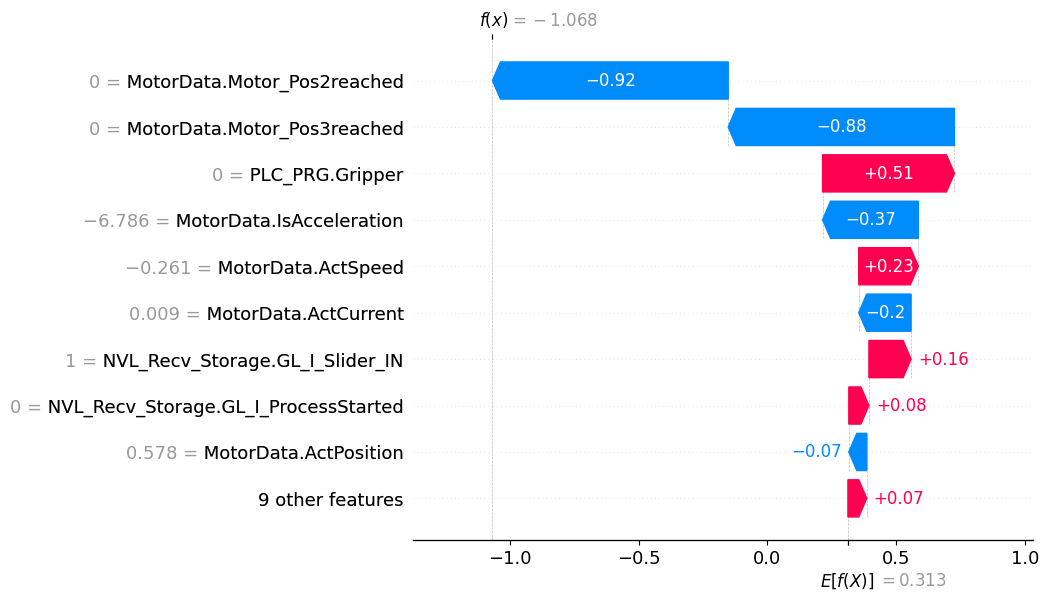

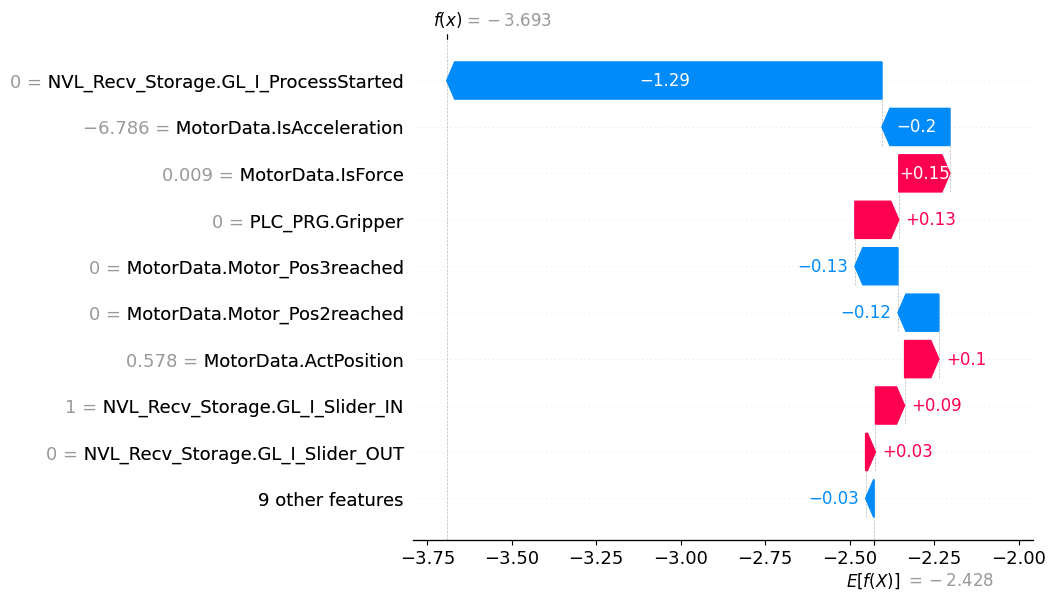

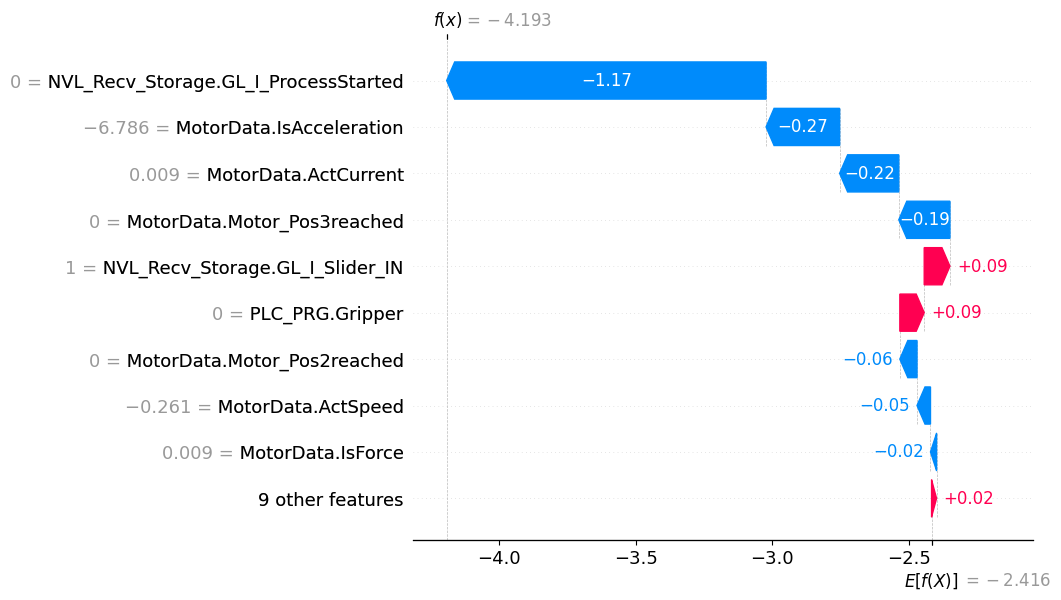

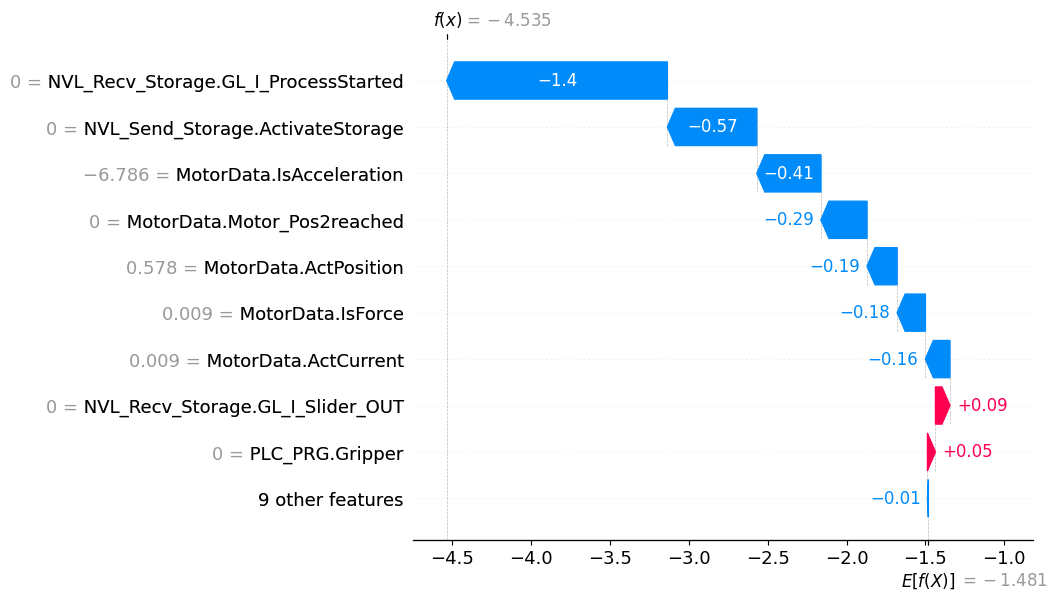

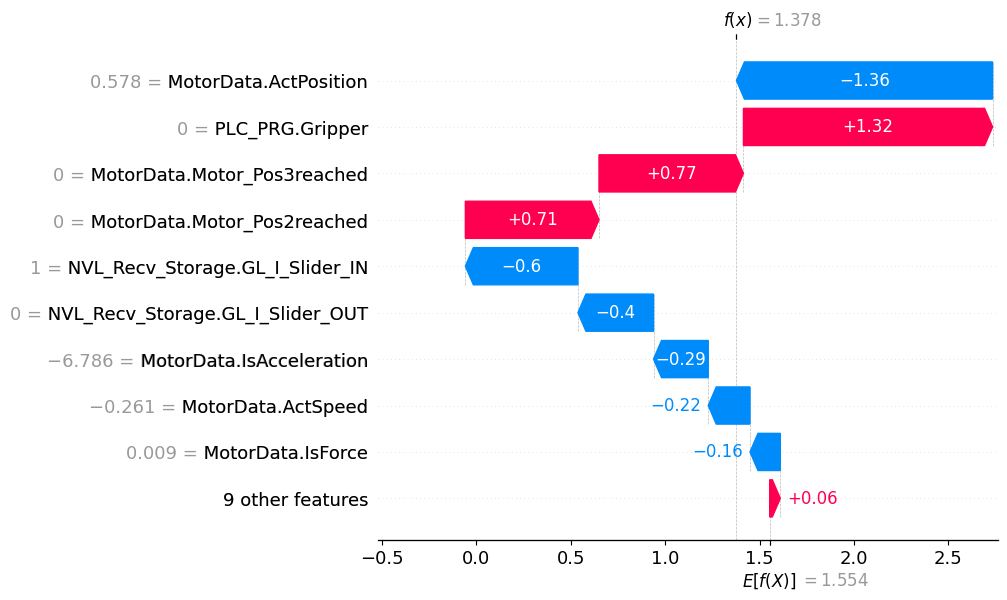

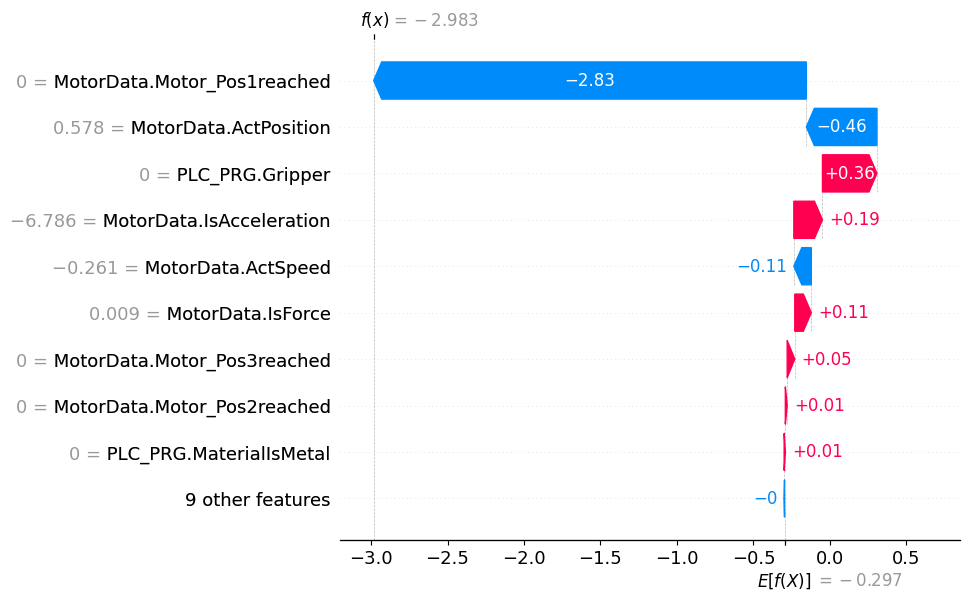

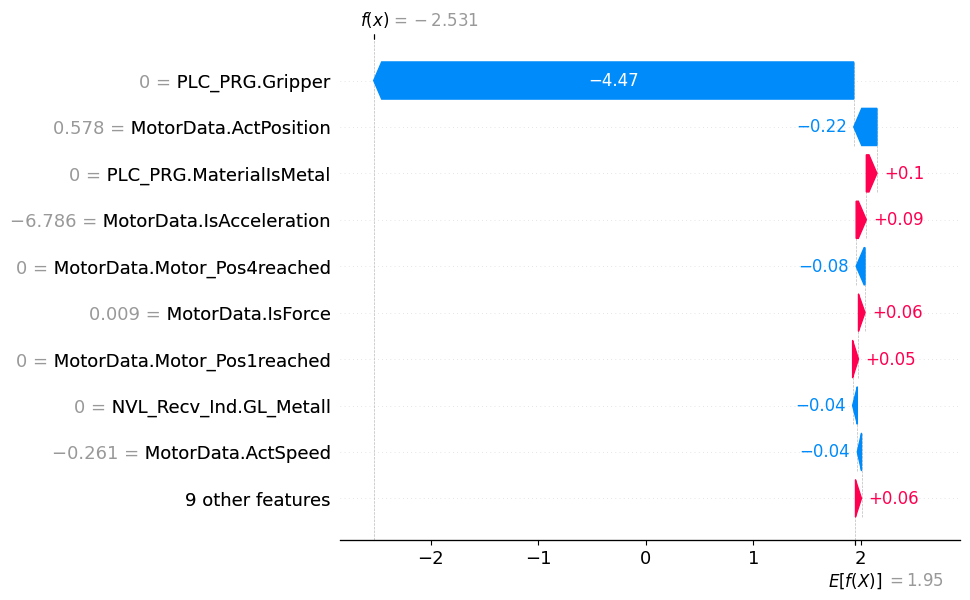

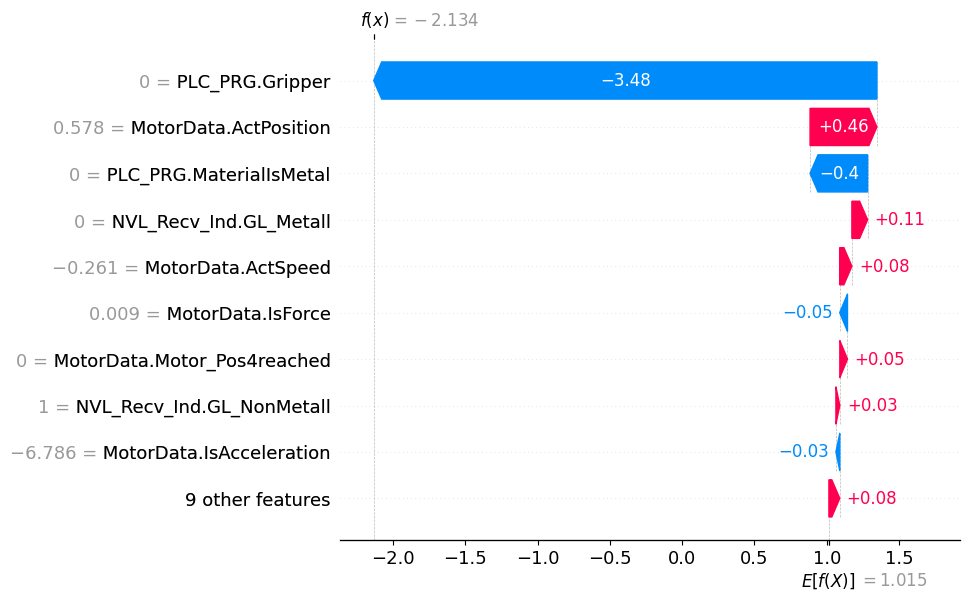

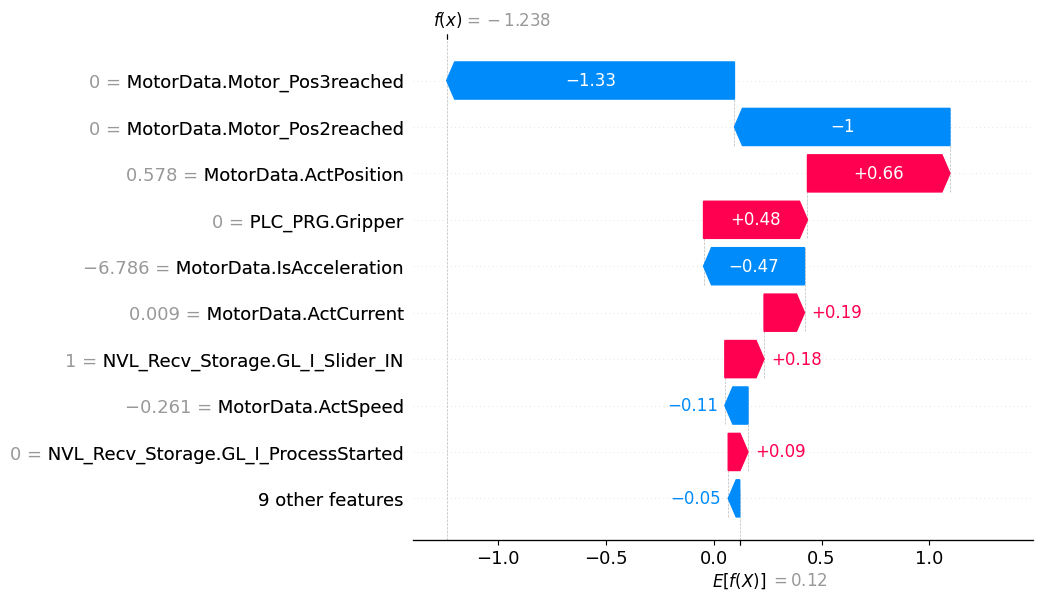

In [67]:
# Cargar el modelo entrenado (XGBoost)
xgb_model = joblib.load("modelos_guardados/17_10_2024/xgboost_model.pkl")

# Verificar las columnas con las que fue entrenado el modelo
expected_columns = xgb_model.get_booster().feature_names
print("Columnas que el modelo espera:", expected_columns)

# Asegurarse de que el conjunto de datos tenga las mismas columnas en el mismo orden
X_train = X_train[expected_columns]

# Inicializar el objeto Explainers con el modelo y los datos de entrenamiento corregidos
explainer = Explainers(model=xgb_model, X_train=X_train)

# Luego generar las explicaciones, por ejemplo, con el gráfico waterfall
explainer.explainer_waterfall()

<h3> Ejecutar evidently_drifting Desde CMD </h3>

<h4> 1. python evidently_drifting.py --reference-loc "dataframes/reference.csv" --current-loc "dataframes/current.csv" </h4>

<h4> 2. evidently ui --workspace ./evidently_workspace --port 8080 </h4>

<h4> 3. Go to http://localhost:8080/ </h4>

<h1> Analizar el Drifting Entre Los Datos Sintéticos y Los Datos Reales </h1>

In [50]:
# Eliminar columnas innecesarias como 'index' o 'Unnamed: 0', si existen
if 'index' in sd.df.columns:
    sd.df = sd.df.drop(columns=['index'])

if 'index' in sd.new_data.columns:
    sd.new_data = sd.new_data.drop(columns=['index'])

if 'Unnamed: 0' in sd.df.columns:
    sd.df = sd.df.drop(columns=['Unnamed: 0'])

if 'Unnamed: 0' in sd.new_data.columns:
    sd.new_data = sd.new_data.drop(columns=['Unnamed: 0'])

# Asegurarse de que tanto el dataframe original como el sintético tengan las mismas columnas y tipos de datos
sd.df = sd.df.reset_index(drop=True)
sd.new_data = sd.new_data.reset_index(drop=True)

# Eliminar cualquier columna innecesaria
if 'index' in sd.df.columns:
    sd.df = sd.df.drop(columns=['index'])
if 'index' in sd.new_data.columns:
    sd.new_data = sd.new_data.drop(columns=['index'])

# Crear un informe de drift (desplazamiento de datos)
data_drift_report = Report(metrics=[DataDriftPreset()])

# Ejecutar el informe comparando los datos originales y los datos sintéticos
data_drift_report.run(reference_data=sd.df, current_data=sd.new_data)

# Guardar el informe en un archivo HTML para visualización
data_drift_report.save_html("drift_report.html")

print("Informe de drift generado: 'drift_report.html'")


Informe de drift generado: 'drift_report.html'


<h1> Generación de Datos Sintéticos </h1>

In [44]:
# Cambiar el renderizador de Plotly a 'png' para evitar depender de nbformat y mostrar gráficos como imágenes estáticas
# Si prefieres que los gráficos se abran en el navegador, puedes cambiar 'png' por 'browser'
pio.renderers.default = 'png'

# Verificar si la columna 'level_0' existe en el dataframe imputado
# Si existe, eliminarla antes de pasar el dataframe al generador de datos sintéticos
if 'level_0' in dataframe_imputado.columns:
    dataframe_imputado.drop('level_0', axis=1, inplace=True)  # Eliminar la columna 'level_0'

# Instanciar la clase Synthetic_Data utilizando el dataframe preprocesado (sin la columna 'level_0')
sd = Synthetic_Data(dataframe_imputado)

# Generar los nuevos datos sintéticos a partir del modelo entrenado
new_df = sd.new_data

# Obtener las columnas del dataframe de datos sintéticos generado
cols = new_df.columns

# Excluir la columna 'level_0' si está presente en el dataframe sintético, para no evaluarla ni graficarla
cols = [col for col in cols if col != 'level_0']

# Recorrer las columnas generadas y generar gráficos comparativos de las columnas reales y sintéticas
for name in cols:
    plot = get_column_plot(
        real_data=sd.df,           # Datos originales
        synthetic_data=sd.new_data, # Datos sintéticos generados
        column_name=name,           # Nombre de la columna que se está evaluando
        metadata=sd.df_metadata     # Metadatos asociados a los datos originales
    )
    # La visualización de los gráficos está desactivada para evitar el error relacionado con nbformat
    # Si quieres habilitar la visualización, puedes descomentar la línea a continuación.
    # plot.show('notebook')  # Alternativamente, puedes usar 'png' o 'browser' como renderizador.

# Guardar los nuevos datos sintéticos en un archivo CSV dentro de la carpeta especificada
sd.save_new_data(new_df, "synthetic_data")

<h1> Predecir Sobre Estos Datos Sintéticos </h1>

In [70]:
# Suponiendo que 'new_df' es el dataframe de datos sintéticos ya generado
dataframe_sintetico = new_df.copy()

# Eliminar las columnas irrelevantes, si existen, como 'level_0', 'index', y 'Label'
columnas_a_eliminar = ['level_0', 'index', 'Label']

# Verificar que las columnas existen antes de intentar eliminarlas
dataframe_para_predicciones_sintetico = dataframe_sintetico.drop(columns=[col for col in columnas_a_eliminar if col in dataframe_sintetico.columns])

# Cargar los modelos guardados (XGBoost, Naïve Bayes, y SVC)
xgb_model = joblib.load("modelos_guardados/17_10_2024/xgboost_model.pkl")
nb_model = joblib.load("modelos_guardados/17_10_2024/naive_bayes_model.pkl")
svc_model = joblib.load("modelos_guardados/17_10_2024/svc_model.pkl")

# Hacer predicciones con el modelo XGBoost
predicciones_xgb_sintetico = xgb_model.predict(dataframe_para_predicciones_sintetico)

# Hacer predicciones con el modelo Naïve Bayes
predicciones_nb_sintetico = nb_model.predict(dataframe_para_predicciones_sintetico)

# Hacer predicciones con el modelo SVC
predicciones_svc_sintetico = svc_model.predict(dataframe_para_predicciones_sintetico)

# Supongamos que las etiquetas verdaderas para los datos sintéticos están almacenadas en 'Label'
# Si no tienes las etiquetas verdaderas para los datos sintéticos, no se puede generar el reporte de clasificación
y_true_sintetico = dataframe_sintetico['Label']

# Evaluar las predicciones de XGBoost
print("Reporte de clasificación para XGBoost (datos sintéticos):")
print(classification_report(y_true_sintetico, predicciones_xgb_sintetico))

# Evaluar las predicciones de Naïve Bayes
print("Reporte de clasificación para Naïve Bayes (datos sintéticos):")
print(classification_report(y_true_sintetico, predicciones_nb_sintetico))

# Evaluar las predicciones de SVC
print("Reporte de clasificación para SVC (datos sintéticos):")
print(classification_report(y_true_sintetico, predicciones_svc_sintetico))

Reporte de clasificación para XGBoost (datos sintéticos):
              precision    recall  f1-score   support

           0       0.17      0.06      0.09        52
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.37      0.50      0.43       128
           5       0.14      0.08      0.10        39
           6       0.49      0.52      0.51       197
           7       0.07      0.05      0.06        43
           8       0.00      0.00      0.00        32

    accuracy                           0.35       500
   macro avg       0.14      0.13      0.13       500
weighted avg       0.32      0.35      0.33       500

Reporte de clasificación para Naïve Bayes (datos sintéticos):
              precision    recall  f1-score   support

           0       0.28      0.29      0.28        52
           1       0.00      0.00      0.00         0
           2